In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [204]:
class KMeans():
    from numpy.linalg import norm
    
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        
    
    def fit(self, X):
        ## 随机选取 k 个点作为簇心
        self.cluster_centers_ = X[np.random.randint(0, len(X), size=self.n_clusters), :]
        
        dis = np.zeros([len(X), self.n_clusters])
        ## 迭代    
        for j in range(self.max_iter):
            ## 计算各点到选取点的距离
            for i in range(self.n_clusters):
                dis[:, i] = norm(X - self.cluster_centers_[i, :], axis=1)

            ## 根据距离重新分配各点簇类
            self.labels_ = np.argmin(dis, axis=1)

            ## 选取新簇的中心
            cluster_centers_new = np.zeros_like(self.cluster_centers_)
            for i in np.unique(self.labels_):
                cluster_centers_new[i, :] = np.mean(X[self.labels_ == i, :], axis=0)

            ## 判断中心是否再发生变化
            if norm(self.cluster_centers_ - cluster_centers_new) < self.tol:
                break
            else:
                self.cluster_centers_ = cluster_centers_new
            
        self.inertia_ = norm(dis[self.labels_])
        
    def fit_predict(self, X):
        self.fit(X)
        return self.labels_
    
    def predict(self, X):
        dis = np.zeros([len(X), self.n_clusters])
        for i in range(self.n_clusters):
            dis[:, i] = norm(X - self.cluster_centers_[i, :], axis=1)
        labels_ = np.argmin(dis, axis=1)
        return labels_

# 两个中心

In [267]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=100)

In [268]:
kmeans = KMeans(n_clusters=2)

In [269]:
y_pred = kmeans.fit_predict(X)
center = kmeans.cluster_centers_

In [270]:
norm(y_pred-y)

0.0

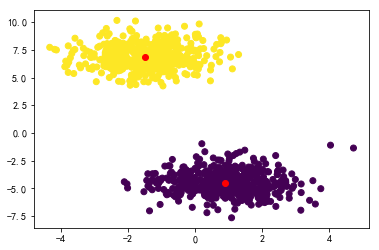

In [271]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(center[:, 0], center[:, 1], c='r')

# 三个中心

In [272]:
X, y = make_blobs(n_samples=1000, centers=3, random_state=100)

kmeans = KMeans(n_clusters=3)

y_pred = kmeans.fit_predict(X)
center = kmeans.cluster_centers_

In [273]:
norm(y_pred-y)

25.826343140289914

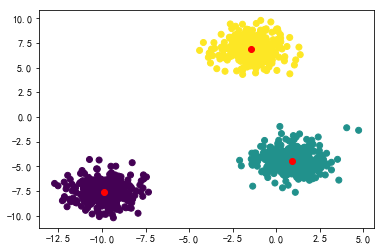

In [266]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(center[:, 0], center[:, 1], c='r')

# 10个中心

In [278]:
X, y = make_blobs(n_samples=10000, centers=10, random_state=100)

kmeans = KMeans(n_clusters=10, max_iter=1000)

y_pred = kmeans.fit_predict(X)
center = kmeans.cluster_centers_

In [279]:
norm(y_pred-y)

371.20479522764788

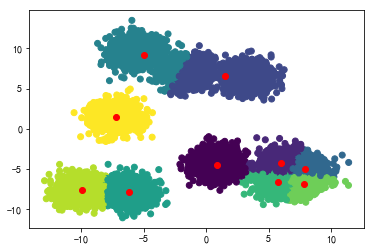

In [280]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(center[:, 0], center[:, 1], c='r')

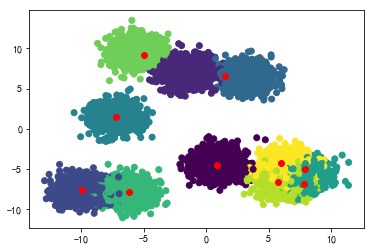

In [281]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(center[:, 0], center[:, 1], c='r')

# 3D

In [303]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=3,  random_state=100)

kmeans = KMeans(n_clusters=3)

y_pred = kmeans.fit_predict(X)
center = kmeans.cluster_centers_

In [321]:
norm(y_pred - y)

25.80697580112788

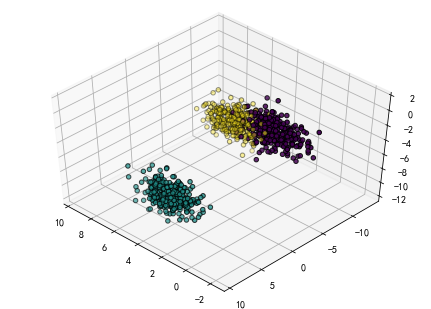

In [320]:
ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:,2], c=y_pred, edgecolor='k')